In [44]:
import pandas as pd
import numpy as np
data = pd.read_csv('2023-Process-Data-Monthly-Combined.csv')

In [6]:
data.columns.tolist()

['year',
 'month',
 'day',
 'Power (MW)',
 'Coal Fuel Energy (MW)',
 'Biomass Fuel Energy (MW)',
 'Oil Fuel Energy (MW)',
 'Flue Gas Flow (Nm3/s)',
 'Oxygen content (%)',
 'Flue Gas Pressure (bar)',
 'Flue Gas Temp (degC)',
 'Coal Fuel Proportion',
 'Biomass Fuel Proportion']

for now we are only interested in 'Coal Fuel Energy (MW)', 'Biomass Fuel Energy (MW)', and 'Oil Fuel Energy (MW)' as input variables (fuel source), and the 'Flue Gas Flow (Nm3/s)' i.e. emission flow rate as our output.

In [45]:
data.replace('?', np.nan, inplace= True)
data_for_manipulation = data.drop(columns=['month', 'year', 'day'], inplace=True)
data_for_manipulation = data.astype({"Power (MW)": np.float64, "Coal Fuel Energy (MW)": np.float64, "Biomass Fuel Energy (MW)": np.float64, "Oil Fuel Energy (MW)": np.float64, "Flue Gas Flow (Nm3/s)": np.float64, "Oxygen content (%)": np.float64, "Flue Gas Pressure (bar)": np.float64, "Flue Gas Temp (degC)": np.float64, "Coal Fuel Proportion": np.float64, "Biomass Fuel Proportion": np.float64})

data_in_and_out = data_for_manipulation.drop(columns=['Power (MW)', 'Oxygen content (%)', 'Flue Gas Pressure (bar)', 'Flue Gas Temp (degC)', 'Coal Fuel Proportion', 'Biomass Fuel Proportion'], inplace=True)

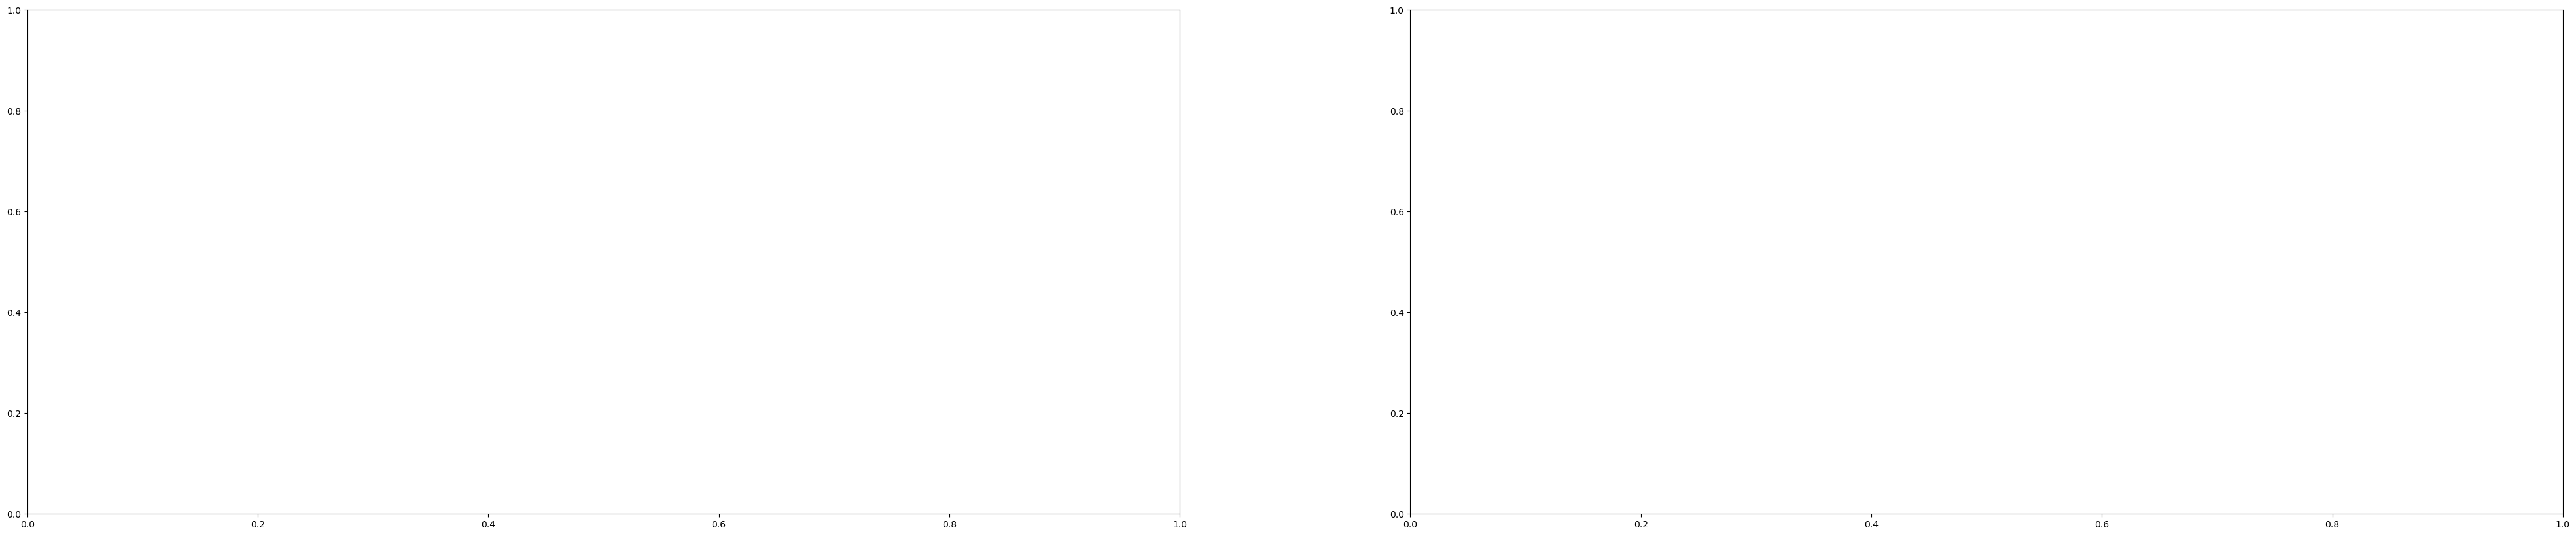

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(50,10))

# sns.pointplot(x="Biomass Fuel Proportion", y="Biomass Fuel Energy (MW)", data=data_for_manipulation, ax=axs[0])
# sns.pointplot(x="Coal Fuel Proportion", y="Coal Fuel Energy (MW)", data=data_for_manipulation, ax=axs[1])


In [9]:
# data_for_manipulation.corr(numeric_only=True).abs()[["Oxygen content (%)"]]

In [10]:
data_for_manipulation.corr(numeric_only=True).abs()[["Biomass Fuel Energy (MW)"]]

,Biomass Fuel Energy (MW)
Coal Fuel Energy (MW),0.445742
Biomass Fuel Energy (MW),1.000000
Oil Fuel Energy (MW),0.137824
Flue Gas Flow (Nm3/s),0.934822


In [11]:
data_for_manipulation.corr(numeric_only=True).abs()[["Flue Gas Flow (Nm3/s)"]]

,Flue Gas Flow (Nm3/s)
Coal Fuel Energy (MW),0.546438
Biomass Fuel Energy (MW),0.934822
Oil Fuel Energy (MW),0.165302
Flue Gas Flow (Nm3/s),1.000000


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_for_manipulation[['Coal Fuel Energy (MW)', 'Biomass Fuel Energy (MW)', 'Oil Fuel Energy (MW)']], data_for_manipulation[['Flue Gas Flow (Nm3/s)']].squeeze(), test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

<h1>LinearRegression</h1>

we are going to try linear regression - it's straight forward, scalable, and easy to comprehend. 

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predict_test)
rmse = mean_squared_error(y_test, predict_test, squared=False)
mae = mean_absolute_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


NameError: name 'predict_test' is not defined

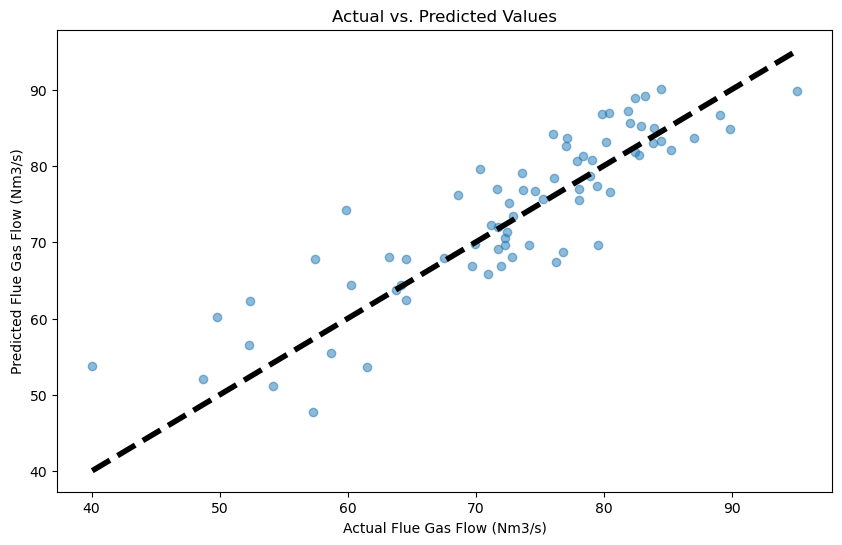

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predict_test, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Flue Gas Flow (Nm3/s)')
plt.ylabel('Predicted Flue Gas Flow (Nm3/s)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) 
plt.show()

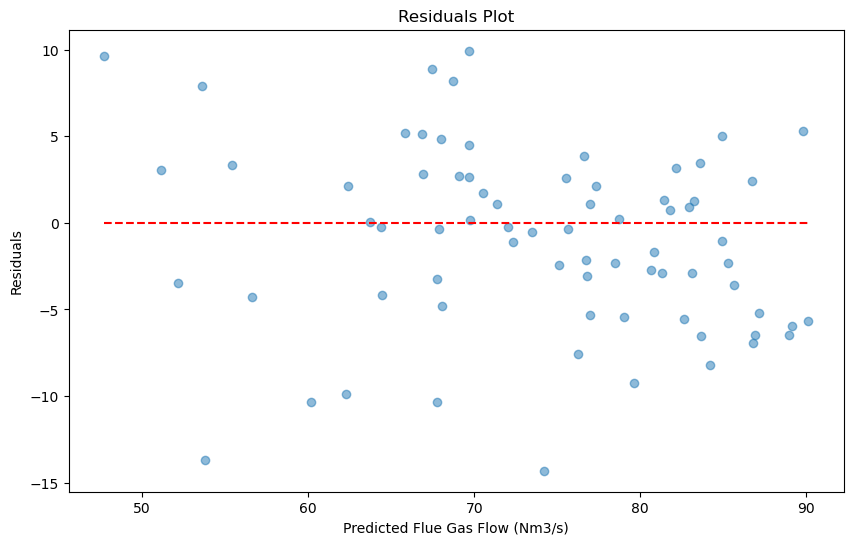

In [ ]:
residuals = y_test - predict_test
plt.figure(figsize=(10, 6))
plt.scatter(predict_test, residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Flue Gas Flow (Nm3/s)')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=predict_test.min(), xmax=predict_test.max(), colors='red', linestyles='--')
plt.show()

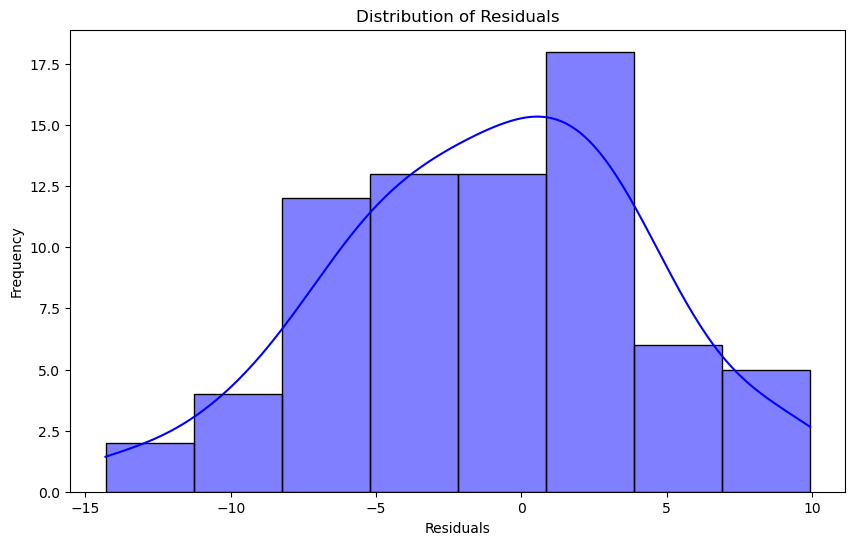

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

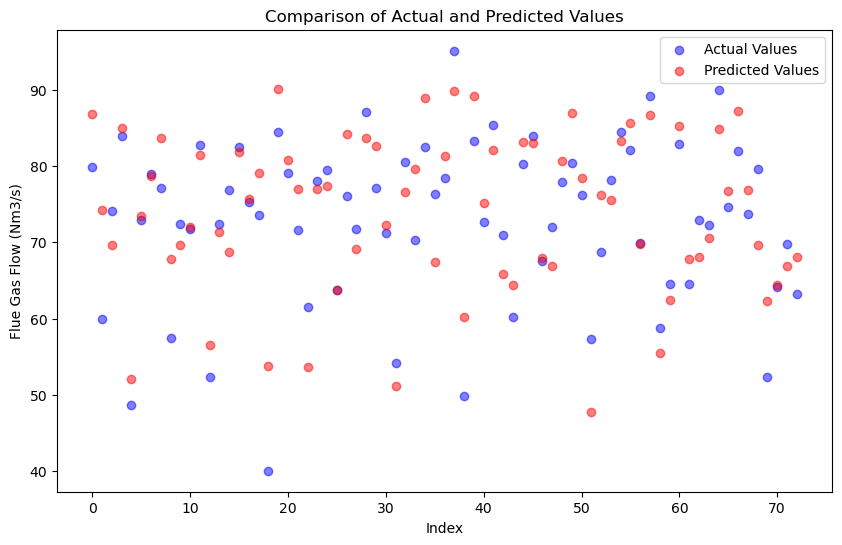

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual Values')
plt.scatter(range(len(predict_test)), predict_test, color='red', alpha=0.5, label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Flue Gas Flow (Nm3/s)')
plt.legend()
plt.show()

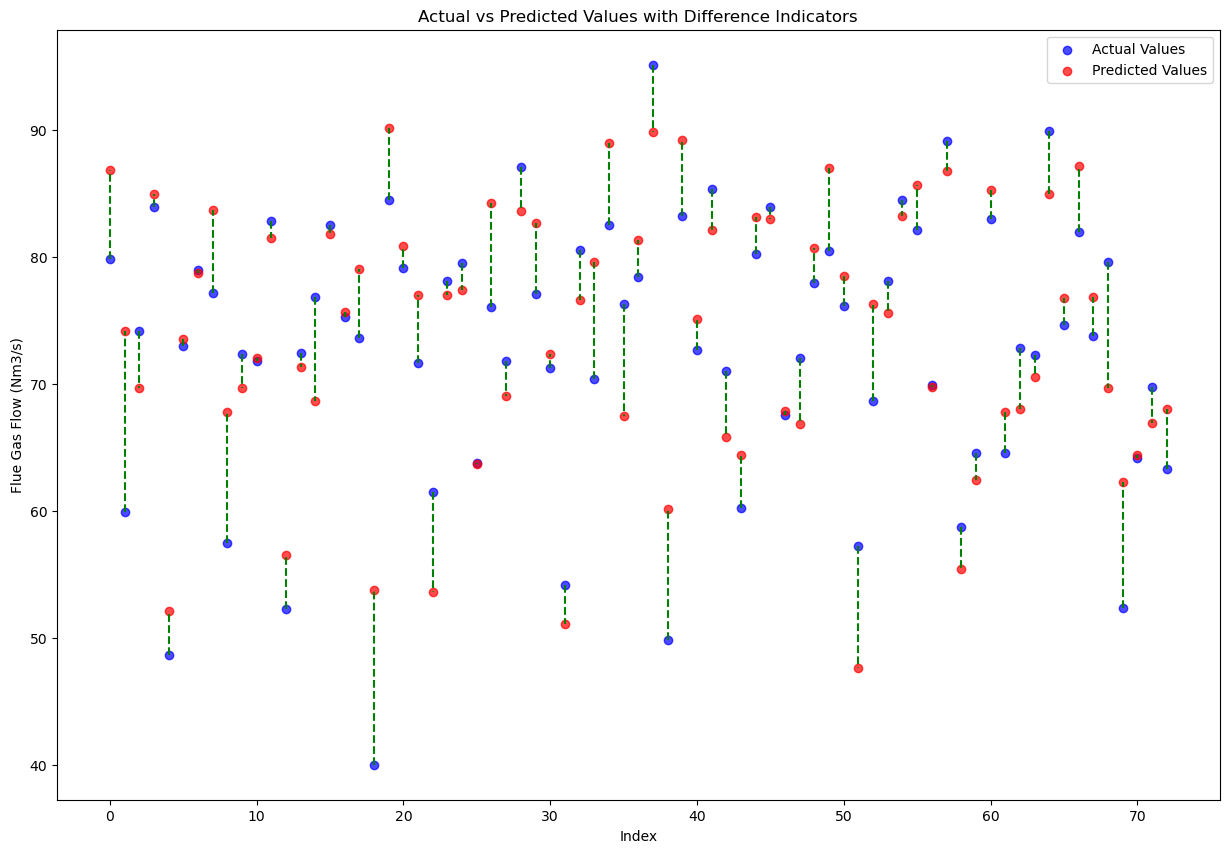

In [ ]:
plt.figure(figsize=(15, 10))
indices = range(len(y_test))  # The x locations for the groups

# Plotting the actual values
plt.scatter(indices, y_test, color='blue', alpha=0.7, label='Actual Values')

# Plotting the predicted values
plt.scatter(indices, predict_test, color='red', alpha=0.7, label='Predicted Values')

# Drawing lines between the actual and predicted values
for i, (actual, predicted) in enumerate(zip(y_test, predict_test)):
    plt.vlines(i, actual, predicted, color='green', linestyle='--')

plt.title('Actual vs Predicted Values with Difference Indicators')
plt.xlabel('Index')
plt.ylabel('Flue Gas Flow (Nm3/s)')
plt.legend()
plt.show()

In [ ]:
print(X_train[:5]) 

[[-1.23004777 -0.25692954 -0.12510865]
 [ 0.91670189  0.93334337 -0.12510865]
 [ 0.93807225  0.99862123 -0.12510865]
 [ 0.48851761  0.29913003 -0.12510865]
 [ 0.01681552  0.66564426 -0.12510865]]


In [ ]:
import numpy as np


# Original standard deviations and means
original_stds = sc.scale_
original_means = sc.mean_

# Adjust coefficients from the standardized scale to the original scale
adjusted_coefficients = model.coef_ / original_stds

# Adjust the intercept
adjusted_intercept = model.intercept_ - np.sum((model.coef_ * original_means) / original_stds)

# Constructing the formula with adjusted coefficients
feature_names = ['Coal Fuel Energy (MW)', 'Biomass Fuel Energy (MW)', 'Oil Fuel Energy (MW)']
formula = f"y = {adjusted_intercept:.5f}"
for coef, name in zip(adjusted_coefficients, feature_names):
    formula += f" + ({coef:.5f} * {name})"

print("Regression Equation on Original Scale:")
print(formula)

Regression Equation on Original Scale:
y = 3.83286 + (0.11878 * Coal Fuel Energy (MW)) + (0.48797 * Biomass Fuel Energy (MW)) + (-325.97844 * Oil Fuel Energy (MW))


<h1>Polynomial Regression</h1>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model
poly_model.fit(X_train, y_train)

# Predict
y_pred = poly_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


MSE: 24.715915315404263
RMSE: 4.97151036561368
MAE: 3.9381206266113775
R-squared: 0.7788640548274264


This isn't that much better in terms of the results compared with the linear regression model. The r-squared is only slightly better and the rest of the params are similar. Also polynomial can be quite unpredictable, let's stay away from it

<h1>Ridge Regression</h1>

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# The coefficients and intercept
print(ridge_model.coef_, ridge_model.intercept_)


# Predict
y_pred = ridge_model.predict(X_test)


[ 3.08687202 16.22279058 -0.54475116] 71.28582191780822


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


MSE: 28.501175208488036
RMSE: 5.338649193240555
MAE: 4.242147968292625
R-squared: 0.7449969285851215


almost identical as the linear regression model - not very practical

<h1>XGBoost - an optimized distributed gradient boosting library</h1>

In [39]:
from xgboost.sklearn import XGBRegressor

model = XGBRegressor(n_estimators=500, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# The coefficients and intercept
# print(model.coef_, model.intercept_)

model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)



In [40]:

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 32.89777415098769
RMSE: 5.735658127101693
MAE: 4.479066452653441
R-squared: 0.705660086300003


We are probably overfitting as the sample size is quite small. We could revisit XGBoost with say hourly data instead of daily.
 